# Working with images in Python

As we seen briefly before, NumPy array can be used to represent image data, and therefore you can perform potentially arbitrarily complex image manipulation by manipulating NumPy arrays. 

Here we are going to take a deeper look at how image data is represented and handled in Python, and take a look at various basic image manipulation/processing operations that can be carried on. Let's get started! 

As always, the very first step should be importing of the essential packages: 

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Arbitrary 2D array as "grayscale" image

Creating an "image" can be as simple as preparing any 2D NumPy array. For example:

In [6]:
flat_image = np.ones((32, 32)) # creates 32x32 "image" filled with ones

can already be interpreted as an image. We plot the image content with `plt.imshow` function:

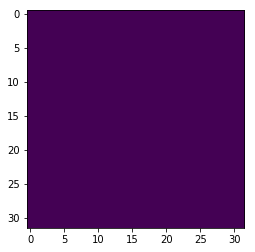

In [7]:
plt.imshow(white_image)

This resulted in some flat image (we'll get to the question of the color very shortly).

Im order for an array to be interpreted as an image, it must be at least 2D in dimensions:

TypeError: Invalid dimensions for image data

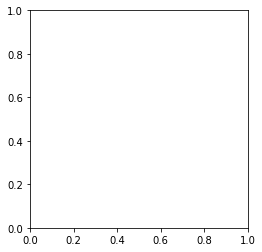

In [32]:
gradation = np.linspace(0, 1, 5)

# wouldn't work because it is just a 1D array
plt.imshow(gradation)

You can overcome this by giving the array an additional dimension with the `np.newaxis` trick:

array([[0.  , 0.25, 0.5 , 0.75, 1.  ]])

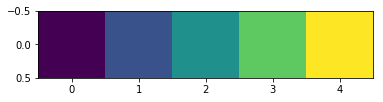

In [33]:
x = gradation[np.newaxis, :] # make 1 x 32 copy
plt.imshow(x)
x

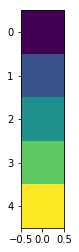

In [34]:
y = gradation[:, np.newaxis] # make 32 x 1 copy
plt.imshow(y)

A bit more interesting image can be used by doing a bit of broadcasting trick:

array([[0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.0625, 0.125 , 0.1875, 0.25  ],
       [0.    , 0.125 , 0.25  , 0.375 , 0.5   ],
       [0.    , 0.1875, 0.375 , 0.5625, 0.75  ],
       [0.    , 0.25  , 0.5   , 0.75  , 1.    ]])

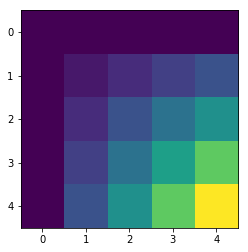

In [36]:
image = x * y

plt.imshow(image)

image

# Images to represent 2D function

Just like a 1D array can be thought of representing a sequence of values read out from a function:

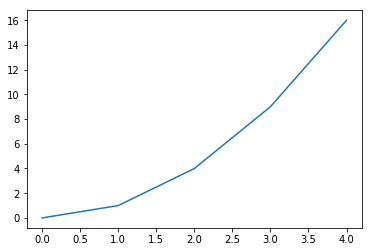

In [40]:
x = np.arange(5)
f = x**2

plt.plot(f) # let matplotlib assume index as x-axis

You can actually think of a 2D array to be representing readouts of a **2D function**. In the earlier example of the gradation image, the image could be thought of as representing a function:

$z = x * y$

such that the value of the $i^\text{th}$ row and $j^\text{th}$ column corresponds to the value of the function at $i^\text{th}$ entry of the y-value and $j^\text{th}$ entry of the x-value.

To make things, concrete, let's take a look at another function:

$z = (x + y) / 2$

In [42]:
x = np.linspace(0, 1, 5)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [43]:
y = np.linspace(0, 1, 5)[:, np.newaxis]
y

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [45]:
z = (x + y) / 2
z

array([[0.   , 0.125, 0.25 , 0.375, 0.5  ],
       [0.125, 0.25 , 0.375, 0.5  , 0.625],
       [0.25 , 0.375, 0.5  , 0.625, 0.75 ],
       [0.375, 0.5  , 0.625, 0.75 , 0.875],
       [0.5  , 0.625, 0.75 , 0.875, 1.   ]])

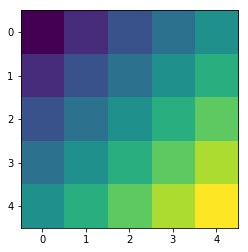

In [46]:
plt.imshow(z)

With some interesting values in the image, it's time to talk about what exactly the color means in our image plot.

## Colormap for a Grayscale Image

When working with a 2D image, each pixel location (row, col location in the 2D array) contains a single value. Such image is typically referred to as a **grayscale**. When plotting a grayscale image, Matplotlib makes use of a **colormap** to decide exactly what color will be used to represent a particular value in your 2D array.

You can get the the mapping displayed by adding a **color bar** to your figure.

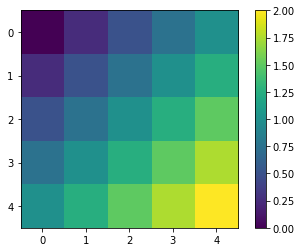

In [48]:
image = x + y

plt.imshow(image)

# add a colorbar to show the mapping
plt.colorbar()

By default Matplotlib choses some colormap, here mapping values from 0 (smallest value found in the image) to 1 (largest value in the image) into a gradation of colors from blue to yellow, respectively. You can specificy what colormap should be used by passing in `cmap` keywrod argument to `imshow`.

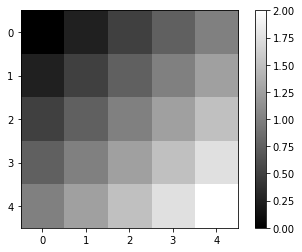

In [49]:
image = x + y

# use cmap argument to change the color map used
plt.imshow(image, cmap='gray')

# add a colorbar to show the mapping
plt.colorbar()

Using "gray" colormap maps different shades of gray to the values of your image, thereby giving rise to the name "grayscale" image.

Aside from specifying some colormap with shorthand names like "gray" or "cool"...

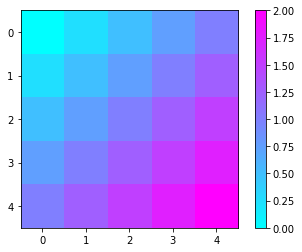

In [51]:
image = x + y

# use "cool" cmap
plt.imshow(image, cmap='cool')

# add a colorbar to show the mapping
plt.colorbar()

You can find listing of colormaps under `plt.cm`

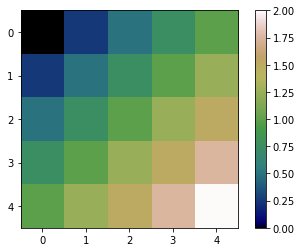

In [52]:
image = x + y

# use colormap plt.cm.gist_earth
plt.imshow(image, cmap=plt.cm.gist_earth)

# add a colorbar to show the mapping
plt.colorbar()

And of course, you can find a good listing of all colormaps provided out-of-box in Matplotlib by [checking out their documentation](https://matplotlib.org/tutorials/colors/colormaps.html).

## Automatic scaling of colormap

Noticed that the colormap was mapped to values between 0 and 1. What happens if our image contains values outside of this range? For instance, let's adjust how we compute the image:

In [53]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

z = x + y

z

array([[-2. , -1.5, -1. , -0.5,  0. ],
       [-1.5, -1. , -0.5,  0. ,  0.5],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5],
       [ 0. ,  0.5,  1. ,  1.5,  2. ]])

Now that our image ranges in values from -2 to 2, let's see what happens if we plot the image:

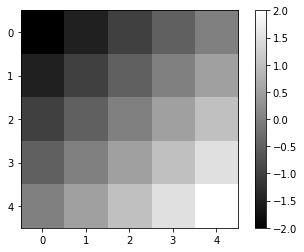

In [54]:
plt.imshow(z, cmap='gray')
plt.colorbar()

Now the the whole range of color (back to white in grayscale) is mapped to values between -2 and 2!

By default, when you pass in an 2D image to Matplotlib to plot, it will map the entire range between the minimum and the maximum value of the image to the color map!

## Adjusting the mapping range

Although this **auto-scaling** of image value range can be useful, sometimes, you would want to control exactly what range of values gets mapped to the colormap, giving you some consistency across different images. For example, if I prepare scaled versions of the images:

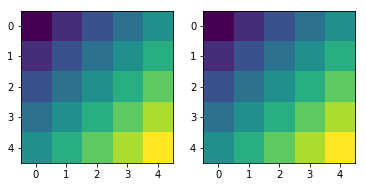

In [56]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

image1 = x + y

image2 = image1 * 0.5 # scaled to half of image1

plt.subplot(1, 2, 1)
plt.imshow(image1)

plt.subplot(1, 2, 2)
plt.imshow(image2)

Because of autoscaling, you cannot tell that these two images actually have differnet values. Plotting the colorbars can help a bit:

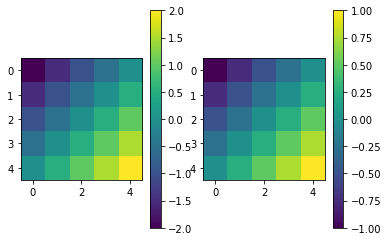

In [57]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

image1 = x + y

image2 = image1 * 0.5 # scaled to half of image1

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.colorbar()

...but the difference is not intuitive! You can actually control the range of color mapping with `vmin` and `vmax` keyword arguments to `imshow`!

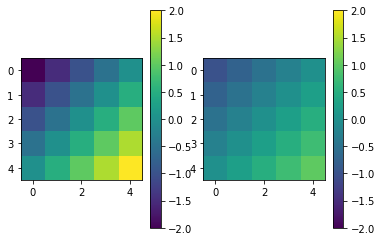

In [58]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

image1 = x + y

image2 = image1 * 0.5 # scaled to half of image1

plt.subplot(1, 2, 1)
plt.imshow(image1, vmin=-2, vmax=2)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(image2, vmin=-2, vmax=2)
plt.colorbar()

Now the two images **are plotted with the same colorbar**, and the difference between the two images (datawise) is much more visually apparent!

Now that we have discussed quite a bit about 2D array as a gray scale image, let's move onto talking about **colored images**!

# Working with colored images

We already saw how a 2D array can be interpreted as a "grayscale" image with the exact pixel values mapping into different color controlled by colormap. But what if I want to represent a **colored image**? This is where a 3D array as image comes into! To get a sense of this, let's go ahead and take a look at a real colored image:

## Loading external images

Although you could create an arbitrary NumPy arrays from scratch and treat them as images as we have been, you are far more likely to want to get images loaded from external sources - i.e. an image file!

The ability to load in common image file formats is provided by a package called `imageio` (along with many other packages)!

In [64]:
import imageio

In [66]:
image = imageio.imread('data/image_japan.jpg')

Let's take a quick look at the image:

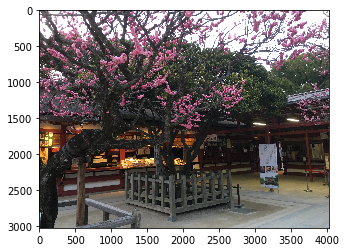

In [67]:
plt.imshow(image)

Let's now take a closer look at this **colored** image.

## 3D arrays as images with color channels

If you take a look at the shape of the loaded color image:

In [68]:
image.shape

(3024, 4032, 3)

you should notice two things:

* the array is now 3D - there is an extra trailing dimension
* and the shape of the array in the third dimension is 3